In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Merge the two datas to create one dataframe

In [3]:
zd=pd.read_csv('zomato.csv',encoding='latin1')
cc=pd.read_csv('Country-Code.csv')

In [4]:
df=zd.merge(cc, how='left')
df.shape

(9551, 22)

In [5]:
# Droping colums not required

In [6]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
146,17303642,Flatbread Neapolitan Pizzeria,216,Boise,"800 W Main Suite 230, Boise, ID 83702",Boise,"Boise, Boise",-116.203466,43.616068,"Italian, Pizza",...,No,No,No,No,2,4.6,Dark Green,Excellent,615,United States
5100,18317502,Cafe Plus,1,New Delhi,"B-29, New Sakya House, New Camp, Aruna Nagar, ...",Majnu ka Tila,"Majnu ka Tila, New Delhi",77.228750,28.702476,Cafe,...,No,No,No,No,2,3.2,Orange,Average,13,India
551,17696941,SOHO Sushi Bar & Deli,216,Waterloo,"119 Main St, Cedar Falls, IA 50613",Cedar Falls,"Cedar Falls, Waterloo",-92.445700,42.537500,"Sandwich, Sushi, Tapas",...,No,No,No,No,2,3.6,Yellow,Good,114,United States
2709,309375,The Master's Fast Food Centre,1,New Delhi,"8, Deep Cinema Complex, Ashok Vihar Phase 1, N...",Ashok Vihar Phase 1,"Ashok Vihar Phase 1, New Delhi",77.173410,28.693061,"Fast Food, Chinese, Bakery",...,No,No,No,No,1,3.5,Yellow,Good,60,India
6442,18291260,The Derby Cookhouse,1,New Delhi,"42, 3rd Floor, NWA, Club Road, Punjabi Bagh We...",Punjabi Bagh,"Punjabi Bagh, New Delhi",77.119885,28.666952,"Continental, Italian, North Indian",...,Yes,Yes,No,No,3,3.6,Yellow,Good,47,India


In [7]:
df=df.drop(['Country Code','Locality','Switch to order menu','Rating color', 'Address'],axis=1)

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [9]:
df.shape

(9551, 17)

In [10]:
# droping duplicate values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9551, 17)

In [13]:
# checking th null values 

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [15]:
df.describe(include='all')

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
count,9.551000e+03,9551,9551,9551,9551.000000,9551.000000,9542,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551.000000,9551
unique,NaN,7446,141,1265,NaN,NaN,1825,NaN,12,2,2,2,NaN,NaN,6,NaN,15
top,NaN,Cafe Coffee Day,New Delhi,"Connaught Place, New Delhi",NaN,NaN,North Indian,NaN,Indian Rupees(Rs.),No,No,No,NaN,NaN,Average,NaN,India
freq,NaN,83,5473,122,NaN,NaN,936,NaN,8652,8393,7100,9517,NaN,NaN,3737,NaN,8652
mean,9.051128e+06,NaN,NaN,NaN,64.126574,25.854381,NaN,1199.210763,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,156.909748,NaN
std,8.791521e+06,NaN,NaN,NaN,41.467058,11.007935,NaN,16121.183073,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,430.169145,NaN
min,5.300000e+01,NaN,NaN,NaN,-157.948486,-41.330428,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN
25%,3.019625e+05,NaN,NaN,NaN,77.081343,28.478713,NaN,250.000000,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,5.000000,NaN
50%,6.004089e+06,NaN,NaN,NaN,77.191964,28.570469,NaN,400.000000,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,31.000000,NaN
75%,1.835229e+07,NaN,NaN,NaN,77.282006,28.642758,NaN,700.000000,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,131.000000,NaN


In [16]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [17]:
df.sample(20)

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
2358,2300061,Hucka,Kanpur,"Arya Nagar, Kanpur",80.320708,26.483672,"Chinese, Fast Food",550,Indian Rupees(Rs.),No,No,No,2,3.3,Average,148,India
545,17697384,HuHot Mongolian Grill,Waterloo,"Cedar Falls, Waterloo",-92.432177,42.512646,"Asian, Chinese",25,Dollar($),No,No,No,2,3.7,Good,113,United States
5421,18489836,New Gaurav Dhaba,New Delhi,"MG Road, New Delhi",77.168212,28.502029,North Indian,250,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0,India
6210,306636,Deli 63,New Delhi,"Paschim Vihar, New Delhi",77.111328,28.677045,"Fast Food, Street Food",300,Indian Rupees(Rs.),No,Yes,No,1,3.6,Good,52,India
4272,18354663,Sardar A Pure Meat Shop,New Delhi,"Jangpura, New Delhi",77.247116,28.584302,"Raw Meats, Fast Food",300,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,3,India
4952,18441680,The Khoj Cafe Restaurent,New Delhi,"Laxmi Nagar, New Delhi",77.276253,28.630224,"Chinese, North Indian",300,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0,India
4961,3937,The One - Le Meridien,New Delhi,"Le Meridien, Janpath, New Delhi",77.218555,28.618863,Continental,4500,Indian Rupees(Rs.),Yes,No,No,4,3.8,Good,273,India
8900,312192,Chinese Food Corner,Noida,"Sector 62, Noida",0.000000,0.000000,Chinese,200,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0,India
3152,9912,Bagli's Kitchen,New Delhi,"Daryaganj, New Delhi",77.240761,28.638144,Parsi,500,Indian Rupees(Rs.),No,No,No,2,3.7,Good,85,India
656,110237,Kabir Restaurant,Ahmedabad,"Gurukul, Ahmedabad",72.523965,23.048505,"North Indian, Chinese, Continental, Desserts, ...",600,Indian Rupees(Rs.),No,Yes,No,2,3.8,Good,432,India


In [18]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

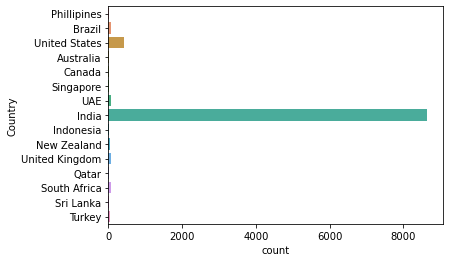

In [19]:
# which country has the highest number of restaurants
sns.countplot(y='Country', data=df);

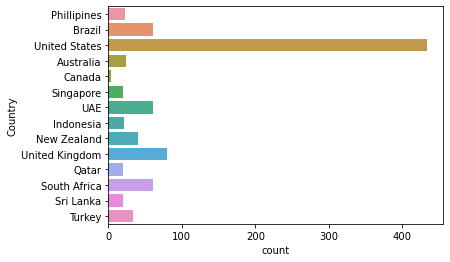

In [20]:
# Country with the highest number of restaurants without India

noind=df.loc[df['Country'] != 'India'] 
sns.countplot(y='Country', data=noind);

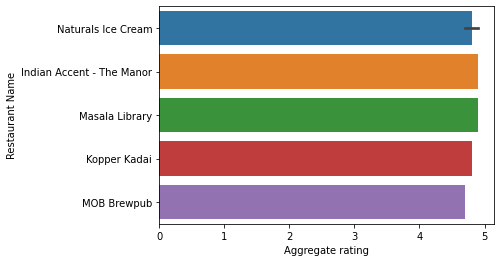

In [21]:
# indias top 5 best restaurants in delhi by rating

indel=df.loc[df['City'] == 'New Delhi']
top5=(indel.sort_values(by=['Aggregate rating'],ascending=False)).iloc[:6]
sns.barplot(y='Restaurant Name', x='Aggregate rating', data=top5)
plt.show()

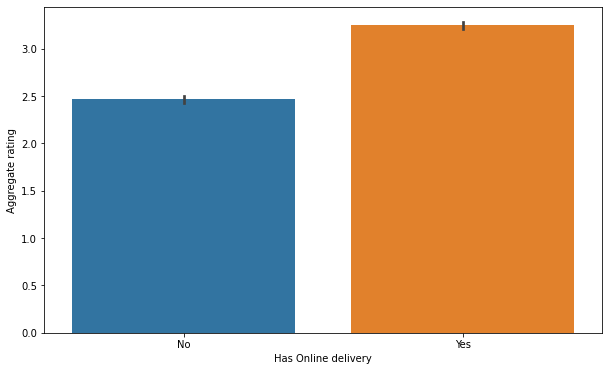

In [43]:
# rating vs has online delivery 

plt.figure(figsize=(10,6))
sns.barplot(y='Aggregate rating', x= 'Has Online delivery', data=df);

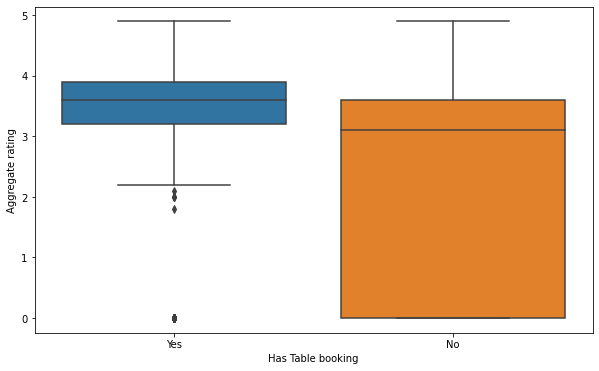

In [41]:
# Has Table booking vs rating

plt.figure(figsize=(10,6))
sns.boxplot(y='Aggregate rating', x= 'Has Table booking', data=df);

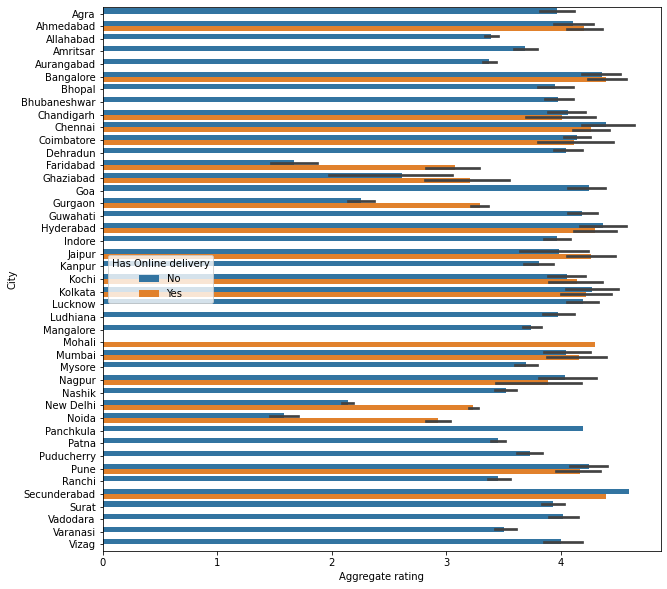

In [51]:
# online order facility location wise in India
inind=df.loc[df['Country'] == 'India'] 
plt.figure(figsize=(10,10))
sns.barplot(x='Aggregate rating', y= 'City', hue='Has Online delivery', data=inind);

In [1]:
df.value_counts('City')

NameError: name 'df' is not defined

In [ ]:
df.value_counts('Rating text')

In [ ]:
df.value_counts('Has Table booking').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Table booking')
plt.show()

In [ ]:
df.value_counts('Has Online delivery').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Online Delivery')
plt.show()

In [ ]:
sns.countplot(x='Price range',data=df)